In [183]:
import pandas as pd

In [184]:
df = pd.read_csv(r"synthetic_crop_data.csv")

In [185]:
df

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0          101          30         48    22.196876  83.982584  7.724075   
1           64          67         36    29.499661  82.462459  7.737949   
2          110          42         40    21.536937  78.404406  7.455471   
3           70          40         40    20.369623  77.841531  8.429900   
4           73          39         33    25.344615  82.360123  7.038288   
...        ...         ...        ...          ...        ...       ...   
9995        96          35         33    28.725336  82.815681  6.968032   
9996        51          30         37    20.563013  79.750681  6.553659   
9997        88          53         35    26.527647  84.920061  7.070009   
9998        94          67         40    23.771841  75.251274  8.413266   
9999        81          63         42    22.033407  76.897192  6.703496   

        Rainfall   Land_Area Crop_Name  
0     297.197670  110.403291      Rice  
1     272.908725   93.247524    Pulses  
2     190.117850  109.164076    Pulses  
3     268.660420   84.762115    Pulses  
4     157.469917   58.286062    Pulses  
...          ...         ...       ...  
9995  287.585965  107.379591      Rice  
9996  183.536311   62.573170   Millets  
9997  234.336339   99.905110     Wheat  
9998  231.417395   95.390352    Pulses  
9999  162.317135   83.357850    Pulses  

[10000 rows x 9 columns]

In [186]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Land_Area      0
Crop_Name      0
dtype: int64

In [187]:
df.duplicated().sum()

0

In [188]:
import seaborn as sns
import numpy as np

In [189]:
import matplotlib.pyplot as plt

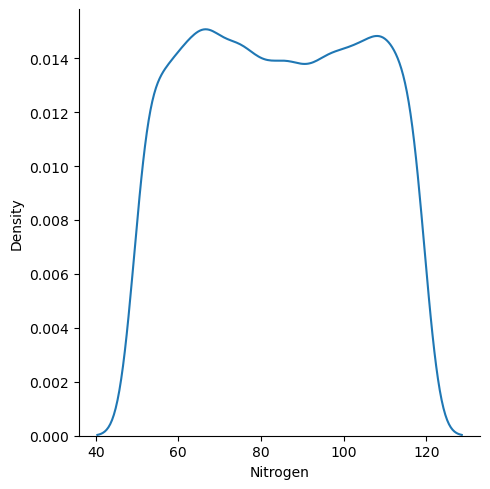

In [190]:
sns.displot(df.Nitrogen,kind='kde')

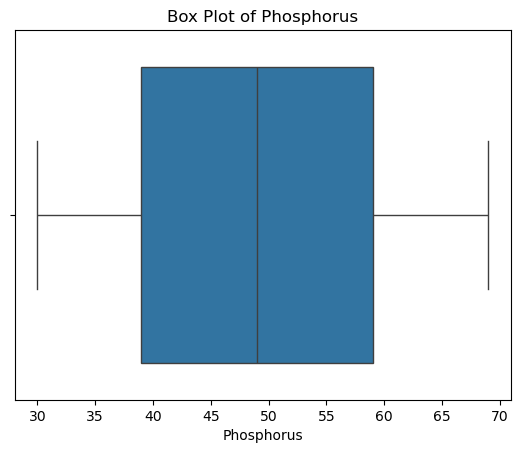

In [191]:
sns.boxplot(x=df['Phosphorus'])
plt.title('Box Plot of Phosphorus')
plt.show()

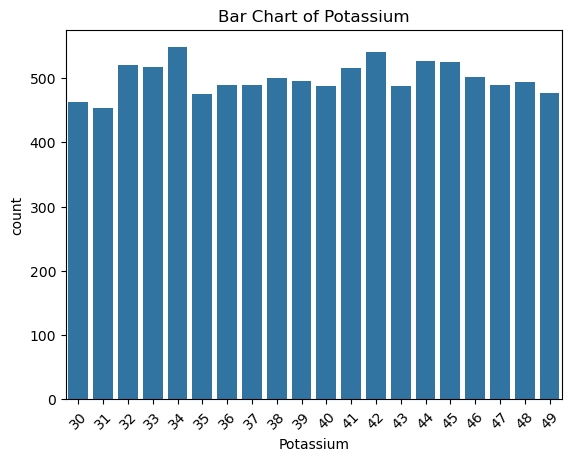

In [192]:
sns.countplot(x=df['Potassium'])
plt.title('Bar Chart of Potassium')
plt.xticks(rotation=45)
plt.show()

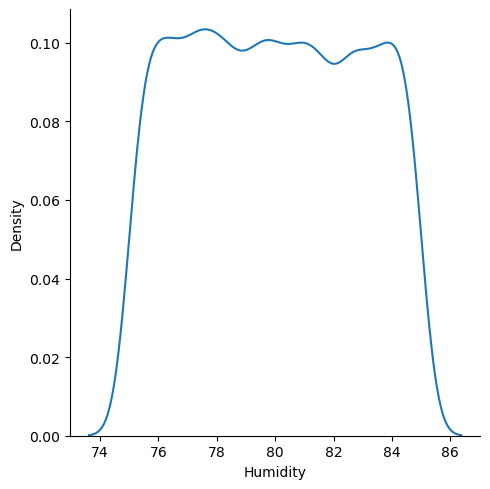

In [193]:
sns.displot(df.Humidity,kind='kde')

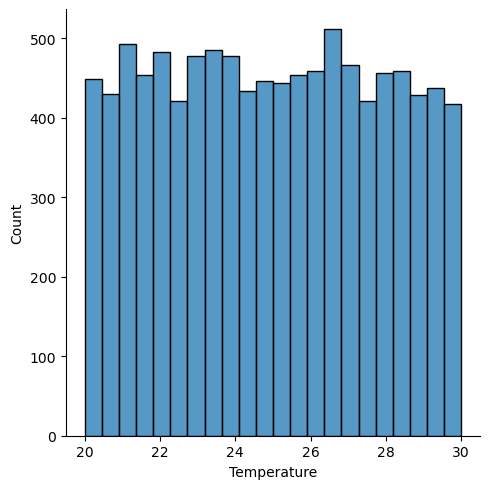

In [194]:
sns.displot(df["Temperature"])

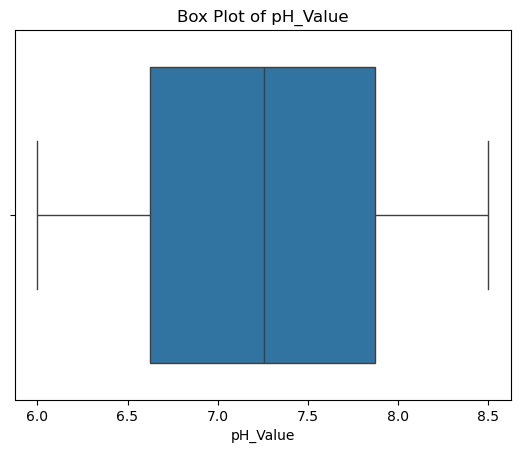

In [195]:
sns.boxplot(x=df['pH_Value'])
plt.title('Box Plot of pH_Value')
plt.show()

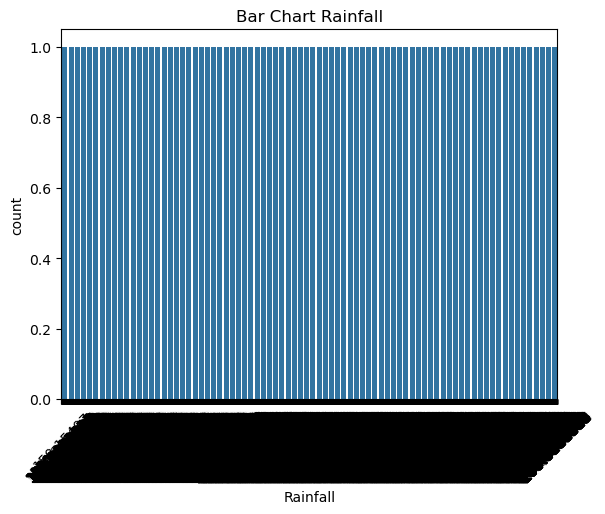

In [196]:
sns.countplot(x=df['Rainfall'])
plt.title('Bar Chart Rainfall')
plt.xticks(rotation=45)
plt.show()

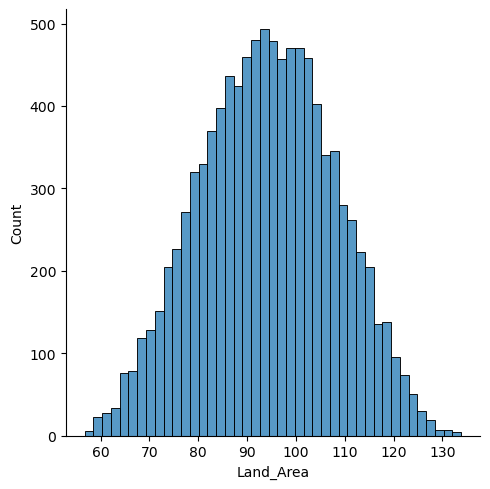

In [197]:
sns.displot(df["Land_Area"])

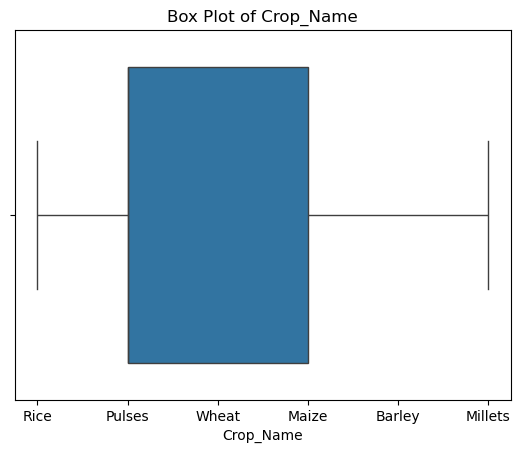

In [198]:
sns.boxplot(x=df['Crop_Name'])
plt.title('Box Plot of Crop_Name')
plt.show()

In [199]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Land_Area      0
Crop_Name      0
dtype: int64

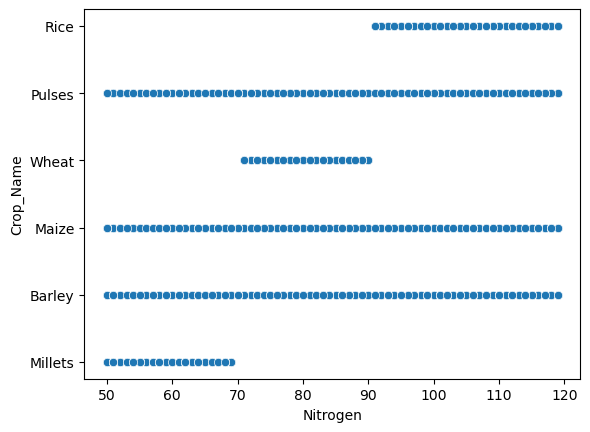

In [200]:
sns.scatterplot(x=df.Nitrogen,y=df.Crop_Name)
plt.show()

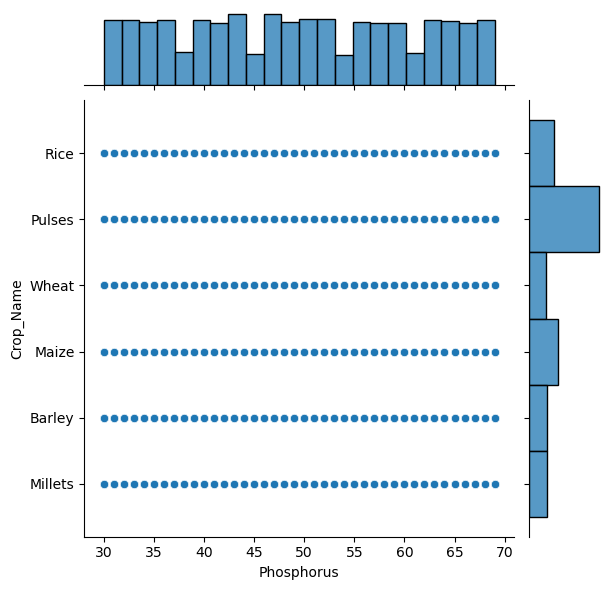

In [201]:
sns.jointplot(x=df.Phosphorus,y=df.Crop_Name)

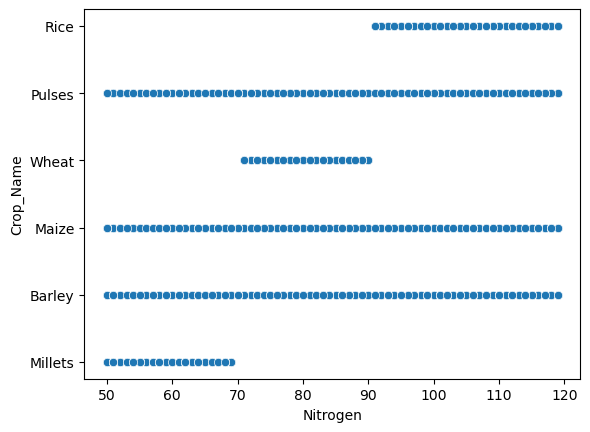

In [202]:
sns.scatterplot(x=df.Nitrogen,y=df.Crop_Name)
plt.show()

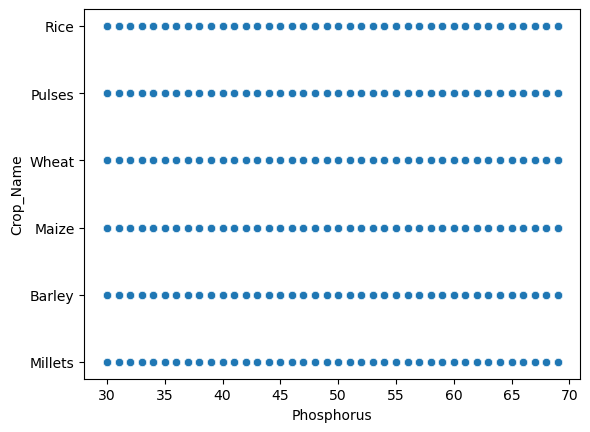

In [203]:
sns.scatterplot(x=df.Phosphorus,y=df.Crop_Name)
plt.show()

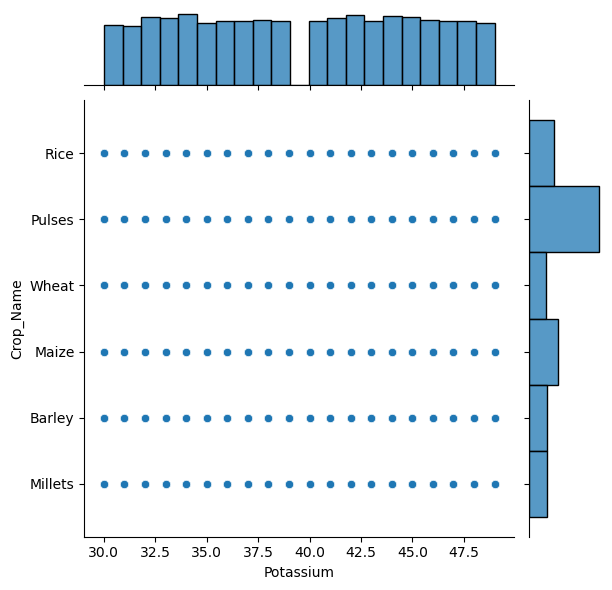

In [204]:
sns.jointplot(x=df.Potassium,y=df.Crop_Name)

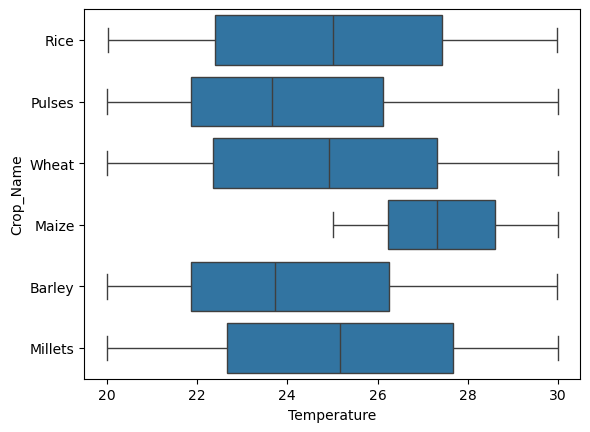

In [205]:
sns.boxplot(x=df.Temperature,y=df.Crop_Name)
plt.show()

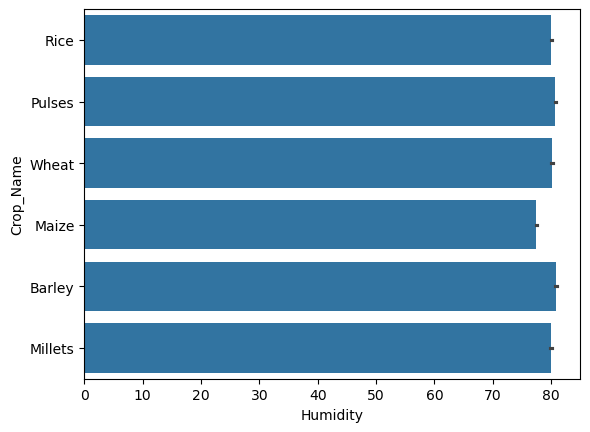

In [206]:
sns.barplot(x=df.Humidity,y=df.Crop_Name)
plt.show()

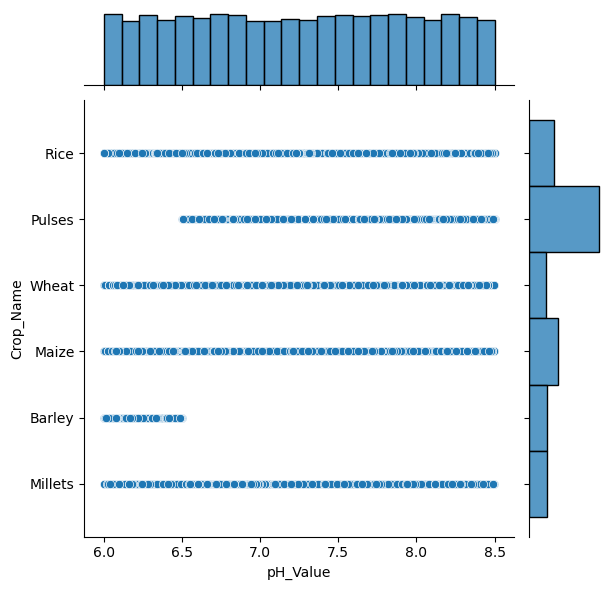

In [207]:
sns.jointplot(x=df.pH_Value,y=df.Crop_Name)

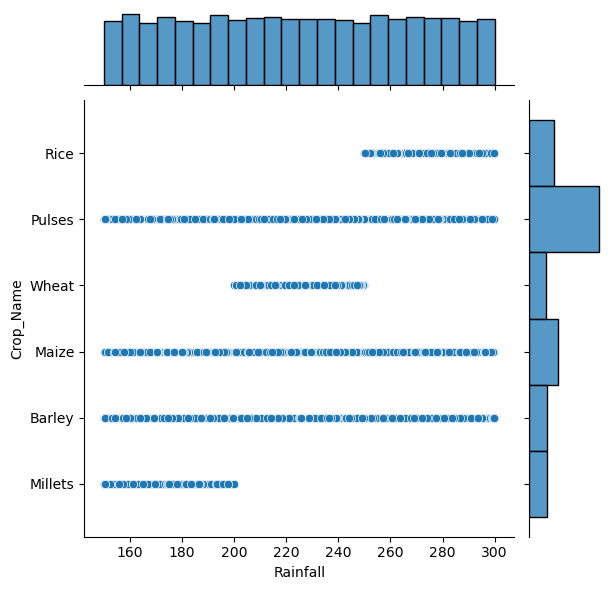

In [208]:
sns.jointplot(x=df.Rainfall,y=df.Crop_Name)
plt.show()

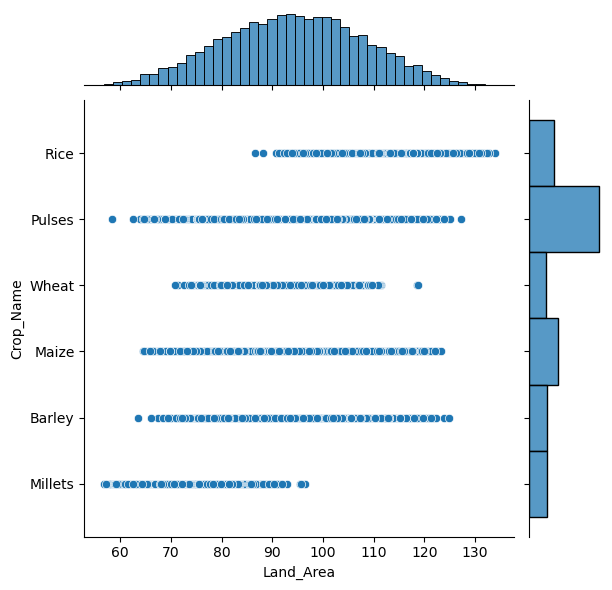

In [209]:
sns.jointplot(x=df.Land_Area,y=df.Crop_Name)
plt.show()

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [211]:
corrmat = df.select_dtypes(include=np.number).corr()
corrmat.style.background_gradient(cmap='coolwarm')

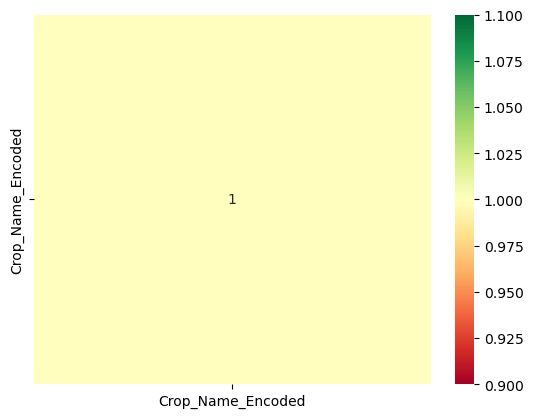

In [212]:
# Calculate the correlation matrix for numerical features
corrmat = df.select_dtypes(include=np.number).corr()

# Set a threshold for selecting top correlated features
threshold = 0.5  # You can adjust this threshold as needed

# Convert 'Crop_Name' to numerical using Label Encoding if it's categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Crop_Name_Encoded'] = le.fit_transform(df['Crop_Name'])

# Include the encoded 'Crop_Name' in the correlation calculation
corrmat_with_crop = df.select_dtypes(include=np.number).corr()

# Now, get the features with correlation above the threshold with the encoded 'Crop_Name'
top_corr_features = corrmat_with_crop[corrmat_with_crop['Crop_Name_Encoded'].abs() > threshold].index.tolist()

# Create the heatmap using the selected features
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


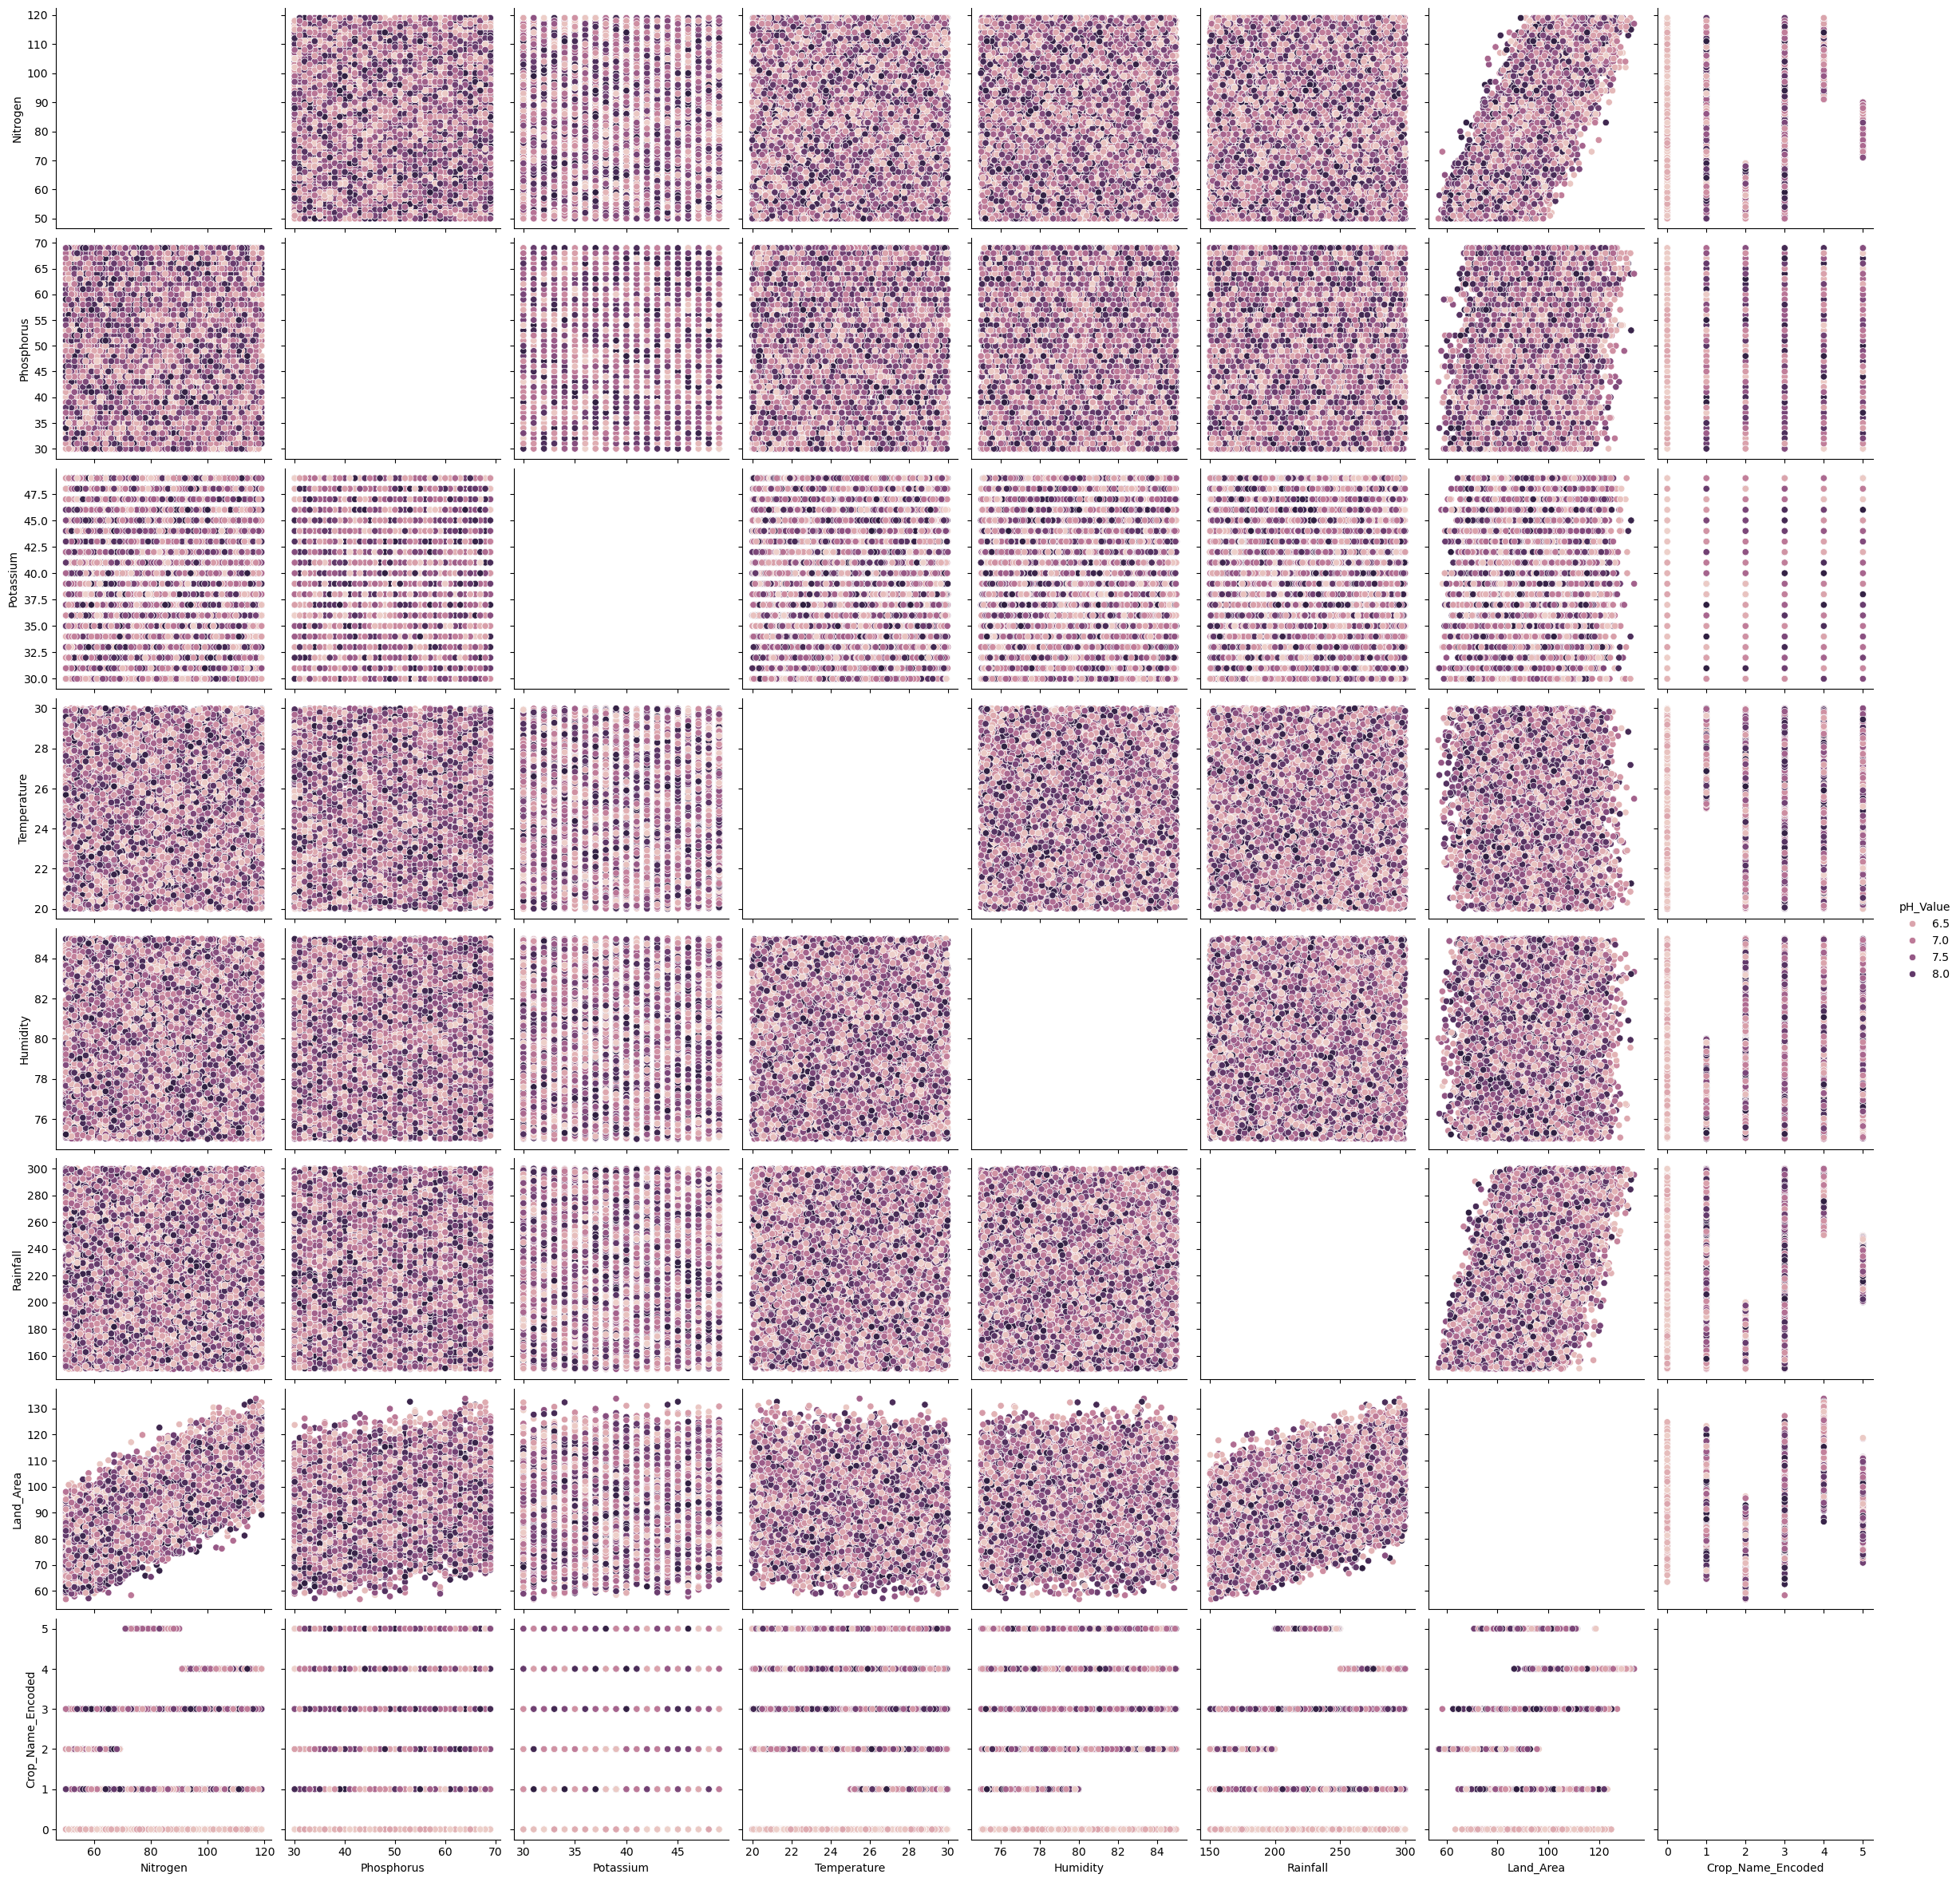

In [213]:
# Assuming 'Crop_Name' is the column you want to use for hue
sns.pairplot(df, hue="pH_Value", size=3)
plt.show()

In [214]:
X=df.drop(['Crop_Name','Crop_Name_Encoded'], axis=1)
y= pd.Categorical(df.Crop_Name)
X.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Land_Area'],
      dtype='object')

In [215]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [216]:
!pip install scikit-learn # Install scikit-learn if you haven't already

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier instead of KNeighborsRegressor
# ... (rest of your code) ...

knnclassifier = KNeighborsClassifier(n_neighbors=8)  # Change to KNeighborsClassifier
knnclassifier.fit(X_train, y_train)
# For a classification problem, use accuracy_score or other relevant metrics
from sklearn.metrics import accuracy_score
print("The accuracy of K Nearest Neighbors Classifier is",
knnclassifier.score(X_train,y_train), knnclassifier.score(X_test,y_test))
knn= [knnclassifier.score (X_train,y_train), knnclassifier.score (X_test,y_test)]

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


The accuracy of K Nearest Neighbors Classifier is 0.801 0.728


In [217]:
from sklearn.svm import SVC  # Import SVR for regression

# ... (rest of your code) ...

svm = SVC()  # Change to SVR
svm.fit(X_train, y_train)
print("The accuracy of SVM is", svm.score(X_train, y_train), svm.score(X_test, y_test))
svm = [svm.score(X_train, y_train), svm.score(X_test, y_test)]

The accuracy of SVM is 0.611125 0.627


In [218]:

knnclassifier =KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Barley       0.14      0.10      0.12       184
       Maize       0.56      0.54      0.55       323
     Millets       0.88      0.97      0.93       191
      Pulses       0.69      0.71      0.70       829
        Rice       0.97      0.97      0.97       290
       Wheat       0.89      0.95      0.92       183

    accuracy                           0.71      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.69      0.71      0.70      2000



In [219]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

dtclassifier =DecisionTreeClassifier(max_depth=7)
dtclassifier.fit(X_train,y_train)
print("The accuracy of Decision Tree Classifier is", dtclassifier.score (X_train,y_train), dtclassifier.score(X_test,y_test))
dt= [dtclassifier.score(X_train,y_train), dtclassifier.score(X_test,y_test)]

The accuracy of Decision Tree Classifier is 0.87275 0.8705


In [220]:
rfclassifier= RandomForestClassifier()
rfclassifier.fit(X_train, y_train)
print("The accuracy of random forest Classifier is",
rfclassifier.score (X_train,y_train), rfclassifier.score(X_test,y_test))
rf =[rfclassifier.score(X_train,y_train), rfclassifier.score(X_test,y_test)]

The accuracy of random forest Classifier is 1.0 0.998


In [221]:

dtclassifier= DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)
y_pred =dtclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Barley       0.98      0.99      0.99       184
       Maize       0.98      0.99      0.98       323
     Millets       0.99      1.00      1.00       191
      Pulses       1.00      1.00      1.00       829
        Rice       0.99      1.00      0.99       290
       Wheat       0.99      0.95      0.97       183

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [222]:

rfclassifier=RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
y_pred =rfclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Barley       0.99      1.00      0.99       184
       Maize       1.00      1.00      1.00       323
     Millets       1.00      1.00      1.00       191
      Pulses       1.00      1.00      1.00       829
        Rice       1.00      1.00      1.00       290
       Wheat       1.00      0.99      0.99       183

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [223]:
import pickle
pickle.dump(knnclassifier, open(r"C:\Users\HP\Downloads\croppredictionsystem\model.pkl", 'wb'))